# МЕТОД LSTM group

## Подключение диска для использования и сохранения данных

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
cd ./drive/MyDrive/InControl/

/content/drive/MyDrive/InControl


## Загрузка и данных из sql и фильтрация по мощности, удаление лишних колонок

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import sqlite3
import os
import numpy as np

cnx = sqlite3.connect('YUGRES_train.sqlite')
print(cnx)
train_df = pd.read_sql_query("SELECT * FROM 'data_train'", cnx, parse_dates=True)
train_df = train_df[train_df['20MBY10CE901_XQ01']>195]
time_ = pd.to_datetime(train_df['timestamp'])
# Создаем список названий столбцов, которые начинаются с "20"
selected_columns = [col for col in train_df.columns if col.startswith("20")]
# Создаем новый DataFrame, содержащий только выбранные столбцы
df_selected_train = train_df[selected_columns]
# df_selected_train.index = time_
df_selected_train['timestamp'] = time_
# test_time = test_df['timestamp']
# test_index = test_df['index']
# test_df = test_df.drop(columns = ['timestamp', 'index'])

<ipython-input-4-7546cdd25a9f>:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_selected_train['timestamp'] = time_


## Удаление из данных для обучения сети, известных аномальных интервалов

In [ ]:
import pandas as pd

# Предположим, что у вас есть большой DataFrame с именем big_df

# Создаем DataFrame с интервалами для удаления
data_to_remove = {'Начало': ['2017-01-13 16:05:00', '2017-01-24 13:35:00', '2017-12-22 00:00:00',
                             '2017-12-22 00:00:00', '2017-03-05 00:00:00', '2017-03-03 00:00:00',
                             '2017-12-22 18:10:00', '2019-05-25 01:10:00', '2017-07-06 00:00:00',
                             '2019-05-26 00:00:00', '2017-03-03 00:00:00'],
                  'Конец': ['2017-01-21 08:50:00', '2017-02-06 05:00:00', '2018-02-19 00:00:00',
                            '2017-12-22 23:55:00', '2017-03-05 23:55:00', '2017-03-03 23:55:00',
                            '2018-02-20 20:55:00', '2019-05-28 14:45:00', '2017-07-06 23:55:00',
                            '2019-05-26 23:55:00', '2017-03-03 23:55:00']}

df_to_remove = pd.DataFrame(data_to_remove)

# Преобразуем столбцы "Начало" и "Конец" в формат datetime
df_to_remove['Начало'] = pd.to_datetime(df_to_remove['Начало'])
df_to_remove['Конец'] = pd.to_datetime(df_to_remove['Конец'])

# Удаляем интервалы из df
clear_df = df_selected_train[~df_selected_train.apply(lambda x: any((x['timestamp'] >= start) and (x['timestamp'] <= end) for start, end in zip(df_to_remove['Начало'], df_to_remove['Конец'])), axis=1)]

# В результате в df останутся только те строки, которые не пересекаются с интервалами из df_to_remove


## Очистка данных

In [ ]:
cd ./Train_LSTM-master/

/content/drive/MyDrive/InControl/Train_LSTM-master


In [ ]:
!pip install loguru

In [ ]:
!python clear_data.py --station Yugres

        Unnamed: 0  ...  20MBN51CF101_XQ01:1
0                0  ...             0.588030
1                1  ...             0.588030
2                2  ...             0.588030
3                3  ...             0.588030
4                4  ...             0.588030
...            ...  ...                  ...
226966      237563  ...             0.578704
226967      237564  ...             0.578704
226968      237565  ...             0.506366
226969      237566  ...             0.578704
226970      237567  ...             0.578704

[226971 rows x 224 columns]
....
*.
*
optimization finished, #iter = 4741
obj = 1035364.275674, rho = 505.885184
nSV = 4559, nBSV = 4527
[LibSVM][1 1 1 ... 1 1 1]
        Unnamed: 0  ...  check_index
0                0  ...            0
1                1  ...            1
2                2  ...            2
3                3  ...            3
4                4  ...            4
...            ...  ...          ...
226966      237563  ...       226966


In [ ]:
df = pd.read_csv('/content/drive/MyDrive/InControl/Train_LSTM-master/YUGRES10/clear_data/clear_data.csv')
time_ = pd.to_datetime(df['timestamp'])

## Удаление лишних колонок

In [ ]:
import pandas as pd

# Предположим, что у вас есть DataFrame df

# Создаем список названий столбцов, которые начинаются с "20"
selected_columns = [col for col in df.columns if col.startswith("20")]

# Создаем новый DataFrame, содержащий только выбранные столбцы
df_selected = df[selected_columns]
df_selected.index = time_

## Подготовка данных
Предобработка данных:
Важно провести предобработку данных, включая:

Заполнение пропущенных значений, если они есть.

Масштабирование признаков, например, используя Min-Max Scaling или Standard Scaling.



In [ ]:
# Заполнение пропущенных значений
df_selected.fillna(method='ffill', inplace=True)

# Масштабирование данных (Min-Max Scaling)
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(df_selected)



<ipython-input-7-6d790d0eaabf>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_selected.fillna(method='ffill', inplace=True)


In [ ]:

import pandas as pd
groups = pd.read_csv('kks.csv', sep = ';')
groups

,External Tags,group,KKS,Name
0,20MBY10CE901_XQ01,0,20MBY10CE901.XQ01,N ген
1,20MBY00CS901_XQ01,1,20MBY00CS901.ZQ11,Частота
2,20MBL11CT010_XQ01,1,20MBL11CT010.XQ01HW,Температура воздуха окружающей среды
3,20MBL11CM001_XQ01,1,20MBL11CM001.XQ01HW,Относительная влажность окружающего воздуха
4,20MBL10CP003_XQ01,1,20MBL10CP003.XQ01HW,Перепад адвления влагоотделитель
...,...,...,...,...
206,20MBH40AN001_XQ01,7,20MBH40AN001.XQ01HW,Вентилятор 1 охлаждающего уплотняющего воздуха
207,20MBH40AN002_XQ01,7,20MBH40AN002.XQ01HW,Вентилятор 2 охлаждающего уплотняющего воздуха
208,20MBH40CT101A_XQ01,7,20MBH40CT101A,Температура охлажденного уплотняющего воздуха ...
209,20MBH40CT102A_XQ01,7,20MBH40CT102A,Температура охлажденного уплотняющего воздуха ...


In [ ]:
group = groups[groups['group'] == 1]
group

,External Tags,group,KKS,Name
1,20MBY00CS901_XQ01,1,20MBY00CS901.ZQ11,Частота
2,20MBL11CT010_XQ01,1,20MBL11CT010.XQ01HW,Температура воздуха окружающей среды
3,20MBL11CM001_XQ01,1,20MBL11CM001.XQ01HW,Относительная влажность окружающего воздуха
4,20MBL10CP003_XQ01,1,20MBL10CP003.XQ01HW,Перепад адвления влагоотделитель
5,20MBL10CP004_XQ01,1,20MBL10CP004.XQ01HW,Перепад на фильтре предвварительной очистки
6,20MBL10CP005_XQ01,1,20MBL10CP005.XQ01HW,Перепд давления на фильтре тонкой очистки
7,20MBL10CP010_XQ01,1,20MBL10CP010.XQ01HW,Перепад давления на фильтре
9,20MBA11DG002_XQ01,1,20MBA11DG002_XQ01,Регулятор положения ВНА
10,20MBA11CP101_XQ01,1,20MBA11CP101,Давление на входе в компрессор
11,20MBA11CT101A_XQ01,1,20MBA11CT101A,Температура на входе в компрессор Датчик учавс...


In [ ]:
from sklearn.preprocessing import StandardScaler

def get_scaled(data_features):
  scaler = StandardScaler()
  scaled_data = pd.DataFrame(
      data=scaler.fit_transform(data_features),
      columns=data_features.columns
  )
  return(scaled_data)

In [ ]:
sum = 0
group_list = []
for i in range(0, 10):
    group = groups[groups['group'] == i]
    # print(group)

    if i != 0:
        group = group.append(groups[groups['group'] == 0])
        # print(group)
    sum += len(group)
    if len(group) == 0:
        continue
    # print(sum)
    group = df_selected[group['External Tags']]
    print(group)
    group_list.append(get_scaled(group))

                     20MBY10CE901_XQ01  20MBA11DG002_XQ02  20MBP23DG151_XQ01  \
timestamp                                                                      
2017-01-04 01:20:00           0.127316          10.880227           0.124432   
2017-01-04 01:25:00           0.127316          10.869514           0.141163   
2017-01-04 01:30:00           0.127316          10.869514           0.124432   
2017-01-04 01:35:00           0.127316          10.858795           0.124432   
2017-01-04 01:40:00           0.127316          10.869514           0.124432   
...                                ...                ...                ...   
2019-01-28 18:35:00         426.455078         100.044037          40.616974   
2019-01-28 18:40:00         426.118317         100.044037          40.583511   
2019-01-28 18:45:00         425.586639         100.044037          40.583511   
2019-01-28 18:50:00         426.437347         100.044037          40.650421   
2019-01-28 18:55:00         425.746155  

<ipython-input-10-a46ad7a4b3ce>:8: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  group = group.append(groups[groups['group'] == 0])
<ipython-input-10-a46ad7a4b3ce>:8: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  group = group.append(groups[groups['group'] == 0])
<ipython-input-10-a46ad7a4b3ce>:8: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  group = group.append(groups[groups['group'] == 0])
<ipython-input-10-a46ad7a4b3ce>:8: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  group = group.append(groups[groups['group'] == 0])
<ipython-input-10-a46ad7a4b3ce>:8: FutureWarning: The frame.append method is deprecated and will be removed from pan

                     20MBD11CT101A_XQ01  20MBD11CT101B_XQ01  \
timestamp                                                     
2017-01-04 01:20:00           55.300018           54.700012   
2017-01-04 01:25:00           55.300018           54.700012   
2017-01-04 01:30:00           55.300018           54.700012   
2017-01-04 01:35:00           55.300018           54.700012   
2017-01-04 01:40:00           55.300018           54.700012   
...                                 ...                 ...   
2019-01-28 18:35:00           94.300018           93.700012   
2019-01-28 18:40:00           94.300018           93.700012   
2019-01-28 18:45:00           94.300018           93.700012   
2019-01-28 18:50:00           94.300018           93.700012   
2019-01-28 18:55:00           94.300018           93.700012   

                     20MBD11CT101C_XQ01  20MBD11CT102A_XQ01  \
timestamp                                                     
2017-01-04 01:20:00           55.000000           55.0

<ipython-input-10-a46ad7a4b3ce>:8: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  group = group.append(groups[groups['group'] == 0])


In [ ]:
len(group_list)

10

## Инициализация модели

In [ ]:
from tensorflow.keras.layers import Input, Dropout, Dense, LSTM, TimeDistributed, RepeatVector
from tensorflow.keras.models import Model
from tensorflow.keras import regularizers

import tensorflow as tf

def autoencoder_model(X):
    inputs = Input(shape=(X.shape[1], X.shape[2]))
    L1 = LSTM(128, activation='relu', return_sequences=True,
              kernel_regularizer=regularizers.l2(0.00))(inputs)
    L2 = LSTM(64, activation='sigmoid', return_sequences=False)(L1)
    L3 = RepeatVector(X.shape[1])(L2)
    L4 = LSTM(64, activation='sigmoid', return_sequences=True)(L3)
    L5 = LSTM(128, activation='relu', return_sequences=True)(L4)
    output = TimeDistributed(Dense(X.shape[2]))(L5)
    model = Model(inputs=inputs, outputs=output)
    return model

In [ ]:
import os
os.mkdir('Yugres_group_lstm')

In [ ]:
cd './Yugres_group_lstm'

/content/drive/MyDrive/InControl/Yugres_group_lstm


In [ ]:
!ls

lstm_group_0.h5  lstm_group_2.h5  lstm_group_4.h5  lstm_group_6.h5  lstm_group_8.h5
lstm_group_1.h5  lstm_group_3.h5  lstm_group_5.h5  lstm_group_7.h5


In [ ]:
def get_len_size(LAG,x_size):
  return int(x_size/LAG) * LAG

LAG = 1
EPOCHS = 300
BATCH_SIZE = 1024


for i in range(0, len(group_list)):
    print(i)
    model_save = f'lstm_group_{i}.h5'
    X_train = group_list[i].to_numpy()
    len_size = get_len_size(LAG, X_train.shape[0])
    X_train = X_train[:len_size].reshape(int(X_train.shape[0] / LAG), int(LAG), X_train.shape[1])
    print("Training data shape:", X_train.shape)
    model = autoencoder_model(X_train)
    #   opt = keras.optimizers.Adam(learning_rate=0.001)
    model.compile(optimizer='adam', loss='mae')
    earlyStopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=20, verbose=0, mode='min')
    mcp_save = tf.keras.callbacks.ModelCheckpoint(model_save, save_best_only=True, monitor='val_loss', mode='min')
    reduce_lr_loss = tf.keras.callbacks.ReduceLROnPlateau(monitor='val_loss', factor=0.1, patience=7, verbose=1,
                                                          min_delta=1e-4, mode='min')
    # cp_callback = tf.keras.callbacks.ModelCheckpoint(filepath=checkpoint_path,
    #                                                 save_weights_only=True,
    #                                                 verbose=1)
    history = model.fit(X_train, X_train, epochs=EPOCHS, batch_size=BATCH_SIZE,
                        validation_split=0.1, callbacks=[earlyStopping, mcp_save, reduce_lr_loss]).history

    # with open(f'/home/art/InControl/Reports/{DIR_EXP}/train_info/model/modelsummary_{i}.txt', 'w') as f:
    #     model.summary(print_fn=lambda x: f.write(x + '\n'))

## Подготовка данных для подачи в сеть

## Обучение модели


## Инференс


In [ ]:
cd ..

/content/drive/MyDrive/InControl


In [8]:
cd ./drive/MyDrive/InControl/

/content/drive/MyDrive/InControl


In [7]:
!ls

drive  sample_data  YUGRES_all.sqlite


## Загрузка данных для теста

In [9]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import sqlite3
import os
import numpy as np

cnx = sqlite3.connect('YUGRES_all.sqlite')
print(cnx.cursor)
test_df = pd.read_sql_query("SELECT * FROM 'data'", cnx, parse_dates=True)
test_df = test_df[test_df['20MBY10CE901_XQ01']>195]
time_ = pd.to_datetime(test_df['timestamp'])
# Создаем список названий столбцов, которые начинаются с "20"
selected_columns = [col for col in test_df.columns if col.startswith("20")]
# Создаем новый DataFrame, содержащий только выбранные столбцы
df_selected_test = test_df[selected_columns]
df_selected_test.index = time_
# df_selected_test['timestamp'] = time_

<built-in method cursor of sqlite3.Connection object at 0x7bcf2bd4ea40>


In [ ]:
df_selected_test

In [ ]:
sum = 0
group_list_test = []
test_time = df_selected_test.index
for i in range(0, 10):
    group = groups[groups['group'] == i]
    # print(group)
    if i != 0:
        group = group.append(groups[groups['group'] == 0])
        # print(group)
    sum += len(group)
    if len(group) == 0:
        continue
    # print(sum)

    group = df_selected_test[group['External Tags']]
    print(group)
    group_list_test.append(get_scaled(group))

In [ ]:
from tensorflow.keras.models import load_model
import scipy

def get_len_size(LAG,x_size):
  return int(x_size/LAG) * LAG

LAG = 1
window_size = 512

for i in range(len(group_list_test)):
  model_file = f'/content/drive/MyDrive/InControl/Yugres_group_lstm/lstm_group_{i}.h5'
  model = load_model(model_file)
  X = group_list_test[i].to_numpy()
  len_size = get_len_size(LAG, X.shape[0])
  X = X[:len_size].reshape(int(X.shape[0] / LAG), LAG, X.shape[1])
  preds = model.predict(X, verbose=1)
  preds = preds[:, 0, :]
  yhat = X[:, 0, :]
  loss = np.mean(np.abs(yhat - preds), axis=1)
  each_loss = np.abs(yhat - preds)
  df_lstm = pd.DataFrame(each_loss, columns=group_list_test[i].columns)
  def scaler_loss(target_value, range_loss = 100):
    hist = np.histogram(target_value, bins=range_loss)
    scaler_loss = scipy.stats.rv_histogram(hist)
    target_value = scaler_loss.cdf(target_value)*range_loss
    scaler_loss = hist
    return target_value, scaler_loss
  target_value, scaler_loss = scaler_loss(loss)
  df_lstm.index = test_time[:len_size][::LAG]
  df_lstm['target_value'] = target_value
  df_lstm['target_mean'] = df_lstm['target_value'].rolling(window=window_size).mean()
  # df_timestamps = pd.DataFrame()
  # df_timestamps['timestamp'] = time_
  # df_lstm = pd.merge(df_lstm, df_timestamps, on='timestamp', how='right')
  # print(df_lstm)
  df_lstm.to_csv(f'/content/drive/MyDrive/InControl/Yugres_group_lstm/lstm_loss_{i}.csv')


6381/6381 [==============================] - 28s 4ms/step
                     20MBY10CE901_XQ01  20MBA11DG002_XQ02  20MBP23DG151_XQ01  \
timestamp                                                                      
2017-01-01 00:00:00           0.132654           0.113791           0.113605   
2017-01-01 00:05:00           0.113060           0.102567           0.190358   
2017-01-01 00:10:00           0.119574           0.105616           0.162704   
2017-01-01 00:15:00           0.122329           0.112341           0.144680   
2017-01-01 00:20:00           0.116602           0.106171           0.164332   
...                                ...                ...                ...   
2019-07-23 20:40:00           0.184739           0.112313           0.745480   
2019-07-23 20:45:00           0.137173           0.111579           0.642690   
2019-07-23 20:50:00           0.183306           0.111922           0.693804   
2019-07-23 20:55:00           0.165704           0.110296     

# Тесты

### Все интервалы


In [11]:
import pandas as pd

data_to_remove = {
    'Начало': ['2017-01-13 16:05:00', '2017-01-24 13:35:00', '2017-12-22 00:00:00',
               '2017-12-22 00:00:00', '2017-03-05 00:00:00', '2017-03-03 00:00:00',
               '2017-12-22 18:10:00', '2019-05-25 01:10:00', '2017-07-06 00:00:00',
               '2019-05-26 00:00:00', '2017-03-03 00:00:00'],
    'Конец': ['2017-01-21 08:50:00', '2017-02-06 05:00:00', '2018-02-19 00:00:00',
             '2017-12-22 23:55:00', '2017-03-05 23:55:00', '2017-03-03 23:55:00',
             '2018-02-20 20:55:00', '2019-05-28 14:45:00', '2017-07-06 23:55:00',
             '2019-05-26 23:55:00', '2017-03-03 23:55:00']
}

# Преобразуем даты в формат Timestamp
date_tuples_all = [(pd.Timestamp(start), pd.Timestamp(end)) for start, end in zip(data_to_remove['Начало'], data_to_remove['Конец'])]

print(date_tuples_all)

import pandas as pd

# Организуйте ваши данные в список словарей
group_list = [
    {
        'Начало': ['2017-01-13 16:05:00', '2017-01-24 13:35:00'],
        'Конец': ['2017-01-21 08:50:00', '2017-02-06 05:00:00']
    },
    {
        'Начало': ['2017-06-25 00:00:00'],
        'Конец': ['2017-06-25 23:55:00']
    },
    {
        'Начало': ['2017-12-22 00:00:00'],
        'Конец': ['2018-02-19 23:55:00']
    },
    {
        'Начало': ['2017-12-22 00:00:00', '2017-03-05 00:00:00'],
        'Конец': ['2017-12-22 23:55:00', '2017-03-05 23:55:00']
    },
    {
        'Начало': ['2017-03-03 00:00:00'],
        'Конец': ['2017-03-03 23:55:00']
    },
    {
        'Начало': ['2017-12-22 18:10:00', '2019-05-25 1:00:00'],
        'Конец': ['2018-02-20 20:55:00', '2019-05-28 14:45:00']
    },
    {
        'Начало': ['2017-07-06 00:00:00'],
        'Конец': ['2017-07-06 23:55:00']
    },
    {
        'Начало': ['2019-05-26 00:00:00'],
        'Конец': ['2019-05-26 23:55:00']
    },
    {
        'Начало': ['2017-03-03 00:00:00'],
        'Конец': ['2017-03-03 23:55:00']
    }
]
date_tuples_list = []
# Создайте цикл для обработки каждой группы
for i, group in enumerate(group_list):
    date_tuples = [(pd.Timestamp(start), pd.Timestamp(end)) for start, end in zip(group['Начало'], group['Конец'])]
    print(f'Группа {i + 1}: {date_tuples}')
    date_tuples_list.append(date_tuples)

[(Timestamp('2017-01-13 16:05:00'), Timestamp('2017-01-21 08:50:00')), (Timestamp('2017-01-24 13:35:00'), Timestamp('2017-02-06 05:00:00')), (Timestamp('2017-12-22 00:00:00'), Timestamp('2018-02-19 00:00:00')), (Timestamp('2017-12-22 00:00:00'), Timestamp('2017-12-22 23:55:00')), (Timestamp('2017-03-05 00:00:00'), Timestamp('2017-03-05 23:55:00')), (Timestamp('2017-03-03 00:00:00'), Timestamp('2017-03-03 23:55:00')), (Timestamp('2017-12-22 18:10:00'), Timestamp('2018-02-20 20:55:00')), (Timestamp('2019-05-25 01:10:00'), Timestamp('2019-05-28 14:45:00')), (Timestamp('2017-07-06 00:00:00'), Timestamp('2017-07-06 23:55:00')), (Timestamp('2019-05-26 00:00:00'), Timestamp('2019-05-26 23:55:00')), (Timestamp('2017-03-03 00:00:00'), Timestamp('2017-03-03 23:55:00'))]
Группа 1: [(Timestamp('2017-01-13 16:05:00'), Timestamp('2017-01-21 08:50:00')), (Timestamp('2017-01-24 13:35:00'), Timestamp('2017-02-06 05:00:00'))]
Группа 2: [(Timestamp('2017-06-25 00:00:00'), Timestamp('2017-06-25 23:55:00')

In [12]:
data_to_remove = {
    'Начало': [],
    'Конец': []
}

# Объедините данные из group_list в data_to_remove
for group in group_list:
    data_to_remove['Начало'].extend(group['Начало'])
    data_to_remove['Конец'].extend(group['Конец'])

# Теперь у вас есть data_to_remove с объединенными данными Начало и Конец
print(data_to_remove)
date_tuples_all = [(pd.Timestamp(start), pd.Timestamp(end)) for start, end in zip(data_to_remove['Начало'], data_to_remove['Конец'])]

{'Начало': ['2017-01-13 16:05:00', '2017-01-24 13:35:00', '2017-06-25 00:00:00', '2017-12-22 00:00:00', '2017-12-22 00:00:00', '2017-03-05 00:00:00', '2017-03-03 00:00:00', '2017-12-22 18:10:00', '2019-05-25 1:00:00', '2017-07-06 00:00:00', '2019-05-26 00:00:00', '2017-03-03 00:00:00'], 'Конец': ['2017-01-21 08:50:00', '2017-02-06 05:00:00', '2017-06-25 23:55:00', '2018-02-19 23:55:00', '2017-12-22 23:55:00', '2017-03-05 23:55:00', '2017-03-03 23:55:00', '2018-02-20 20:55:00', '2019-05-28 14:45:00', '2017-07-06 23:55:00', '2019-05-26 23:55:00', '2017-03-03 23:55:00']}


### По группам

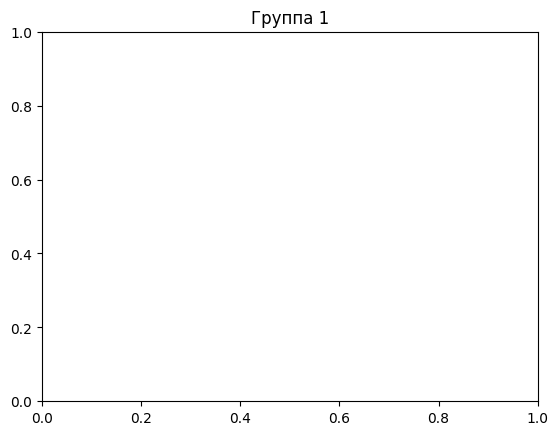

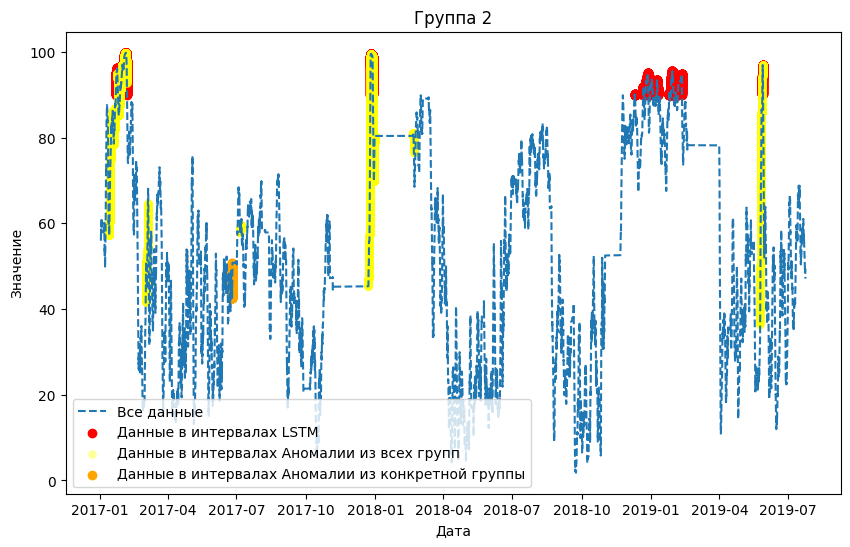

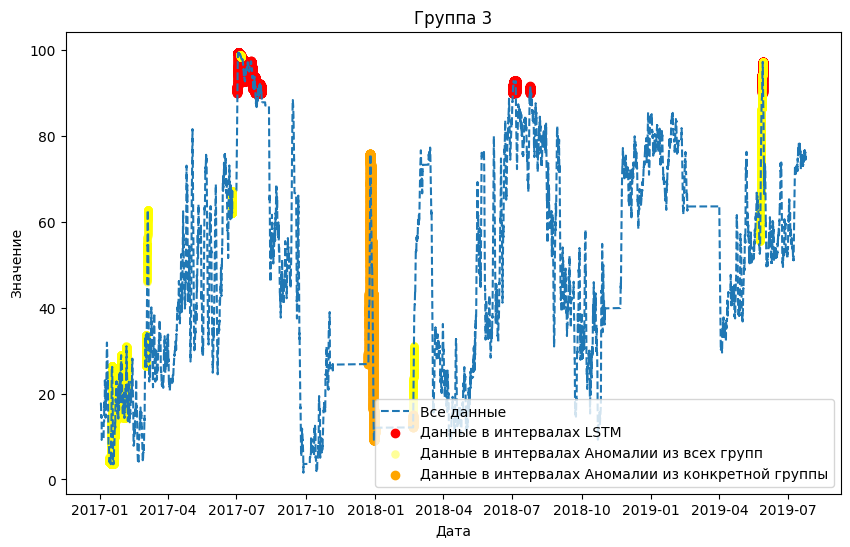

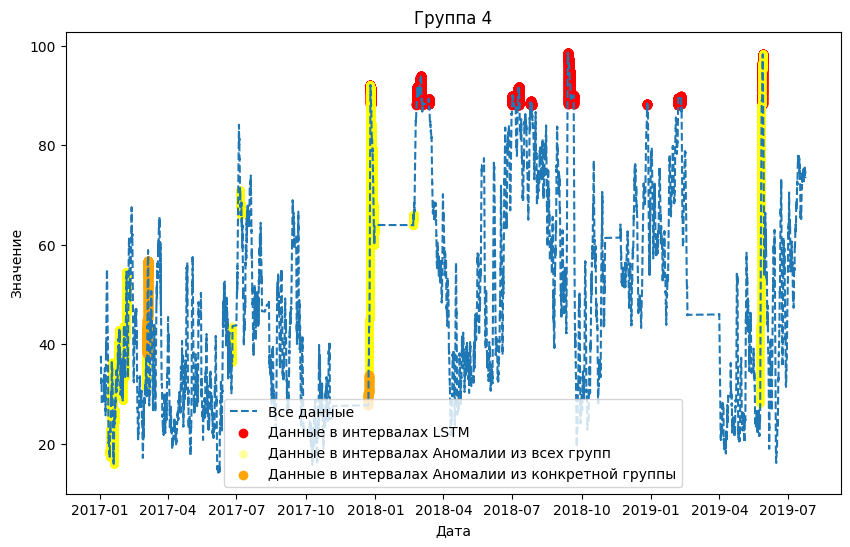

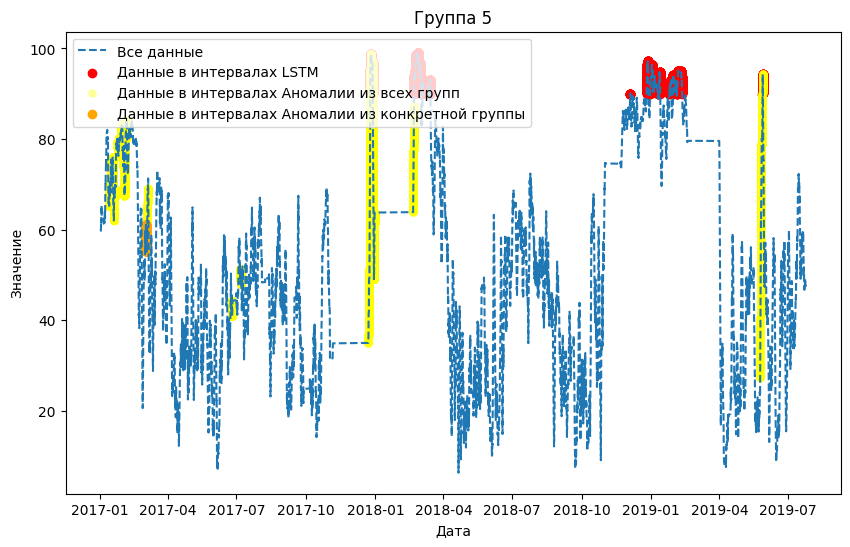

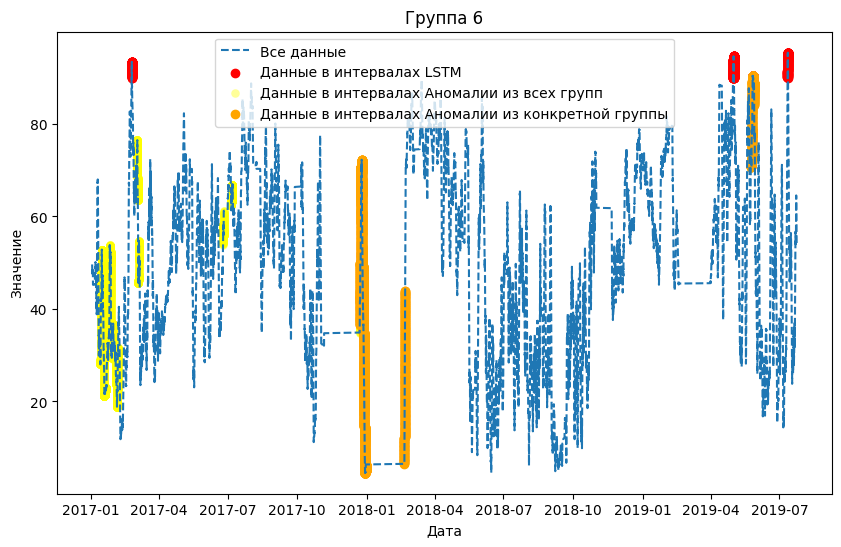

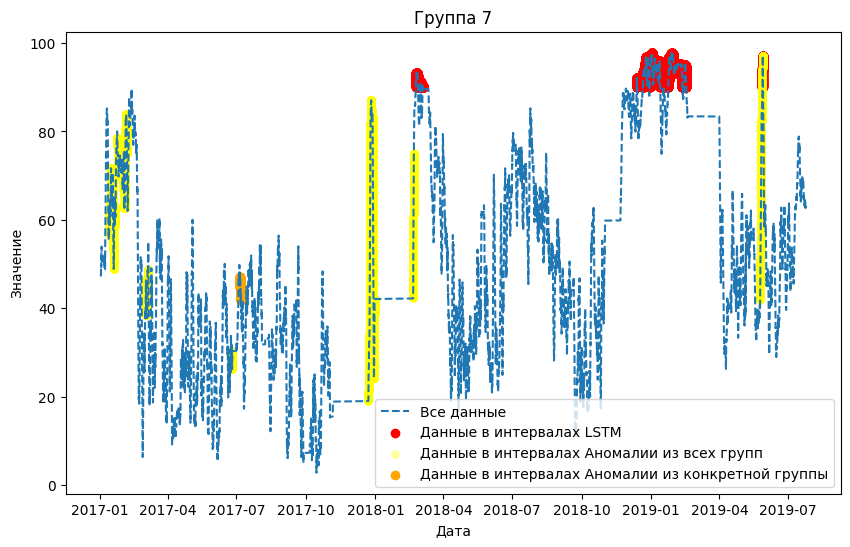

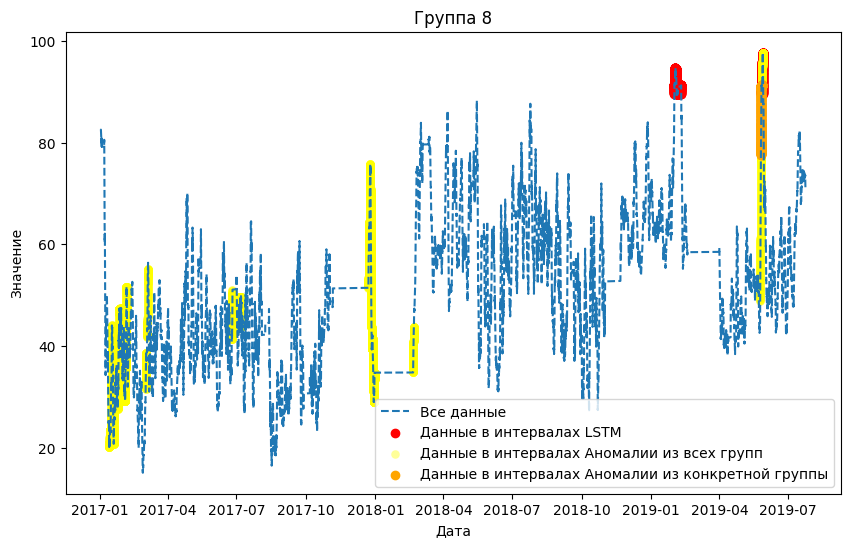

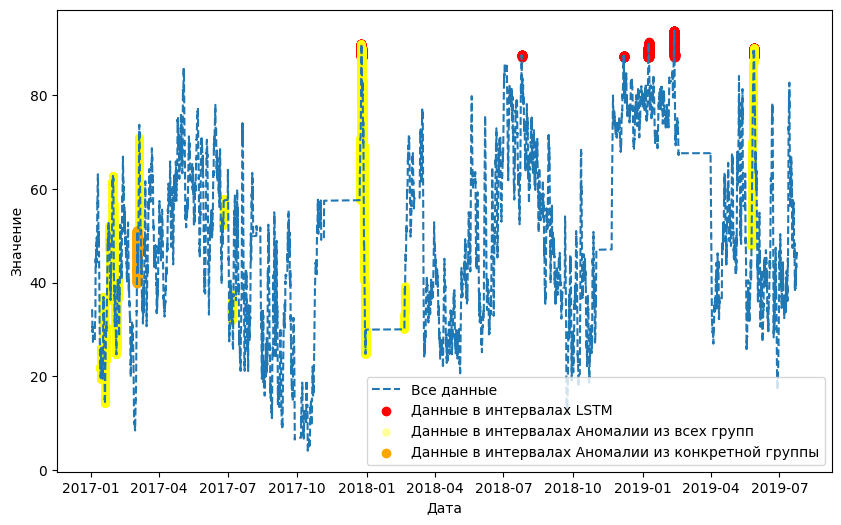

In [19]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


for i in range(1, len(group_list)):
  df =  pd.read_csv(f'/content/drive/MyDrive/InControl/Yugres_group_lstm/lstm_loss_{i}.csv')
  df['timestamp'] = pd.to_datetime(df['timestamp'])
  # Замените 'df' на вашу собственную переменную DataFrame
  # и 'timestamp' на имя столбца с временными метками,
  # 'value' на имя столбца со значениями

  # Рассчитываем порог
  short_threshold = np.percentile(df['target_value'], 90)

  # Создаем список, чтобы хранить интервалы
  intervals = []

  # Инициализируем переменные для текущего интервала
  current_interval_start = None
  current_interval_end = None

  # Проходимся по всем строкам DataFrame
  for index, row in df.iterrows():
      timestamp = row['timestamp']  # Предполагается, что столбец 'timestamp' содержит временные метки
      # Если значение выше порога, начинаем новый интервал
      if row['target_mean'] > short_threshold:
          if current_interval_start is None:
              current_interval_start = timestamp
          current_interval_end = timestamp
      else:
          # Если значение ниже порога, закрываем текущий интервал
          if current_interval_start is not None:
              # Проверяем длительность интервала
              if current_interval_end - current_interval_start > pd.Timedelta(seconds=200):
                  intervals.append((current_interval_start, current_interval_end))
              # Сбрасываем переменные текущего интервала
              current_interval_start = None
              current_interval_end = None

  # Проверяем последний интервал после завершения цикла
  if current_interval_start is not None:
      if current_interval_end - current_interval_start > pd.Timedelta(seconds=200):
          intervals.append((current_interval_start, current_interval_end))

  df['timestamp'] = pd.to_datetime(df['timestamp'])
# Определите интервалы
  intervals = intervals
  intervals_an = date_tuples_list[i]
  intervals_an_all = date_tuples_all
  # Фильтруем DataFrame, чтобы получить только строки, которые находятся в интервалах
  filtered_df = pd.DataFrame()
  filtered_df_an = pd.DataFrame()
  filtered_df_an_all = pd.DataFrame()

  for interval in intervals:
      start_date, end_date = interval
      mask = (df['timestamp'] >= start_date) & (df['timestamp'] <= end_date)
      interval_df = df.loc[mask]
      filtered_df = pd.concat([filtered_df, interval_df])
  # print(filtered_df)
  for interval in intervals_an:
      start_date, end_date = interval
      mask = (df['timestamp'] >= start_date) & (df['timestamp'] <= end_date)
      interval_df = df.loc[mask]
      filtered_df_an = pd.concat([filtered_df_an, interval_df])
  for interval in intervals_an_all:
      start_date, end_date = interval
      mask = (df['timestamp'] >= start_date) & (df['timestamp'] <= end_date)
      interval_df = df.loc[mask]
      filtered_df_an_all = pd.concat([filtered_df_an_all, interval_df])
  # print(filtered_df_an)

  # Отрисовываем полученные данные
  plt.title(f'Группа {i}')
  plt.figure(figsize=(10, 6))
  plt.plot(df['timestamp'], df['target_mean'], label='Все данные', linestyle='--',)
  plt.scatter(filtered_df['timestamp'], filtered_df['target_mean'], color='red', label='Данные в интервалах LSTM')
  plt.scatter(filtered_df_an_all['timestamp'], filtered_df_an_all['target_mean'], color='yellow', label='Данные в интервалах Аномалии из всех групп', alpha = 0.4,linewidths=0.1)
  plt.scatter(filtered_df_an['timestamp'], filtered_df_an['target_mean'], color='orange', label='Данные в интервалах Аномалии из конкретной группы')
  plt.xlabel('Дата')
  plt.ylabel('Значение')
  plt.legend()
  fig1 = plt.gcf()
  plt.draw()
  fig1.savefig(f'/content/drive/MyDrive/InControl/Yugres_group_lstm/lstm_group_{i}.png',bbox_inches='tight', dpi=1000)
  import json
  from datetime import datetime


  # Преобразование интервалов в список словарей
  interval_dicts = []

  for start, end in intervals:
      interval_dict = {
          "start": str(start),
          "end": str(end),
          "duration_hours": (end - start).total_seconds() / 3600
      }
      interval_dicts.append(interval_dict)

  # Преобразование в JSON
  json_data = json.dumps(interval_dicts, indent=4)

  # Сохранение JSON в файл
  with open(f"/content/drive/MyDrive/InControl/Yugres_group_lstm/intervals_{i}.json", "w") as json_file:
      json_file.write(json_data)

In [ ]:
import json
from datetime import datetime


# Преобразование интервалов в список словарей
interval_dicts = []

for start, end in intervals:
    interval_dict = {
        "start": str(start),
        "end": str(end),
        "duration_hours": (end - start).total_seconds() / 3600
    }
    interval_dicts.append(interval_dict)

# Преобразование в JSON
json_data = json.dumps(interval_dicts, indent=4)

# Сохранение JSON в файл
with open("intervals.json", "w") as json_file:
    json_file.write(json_data)

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

df['timestamp'] = pd.to_datetime(df['timestamp'])
# Определите интервалы
intervals = intervals
intervals_an = date_tuples

# Фильтруем DataFrame, чтобы получить только строки, которые находятся в интервалах
filtered_df = pd.DataFrame()
filtered_df_an = pd.DataFrame()

for interval in intervals:
    start_date, end_date = interval
    mask = (df['timestamp'] >= start_date) & (df['timestamp'] <= end_date)
    interval_df = df.loc[mask]
    filtered_df = pd.concat([filtered_df, interval_df])
for interval in intervals_an:
    start_date, end_date = interval
    mask = (df['timestamp'] >= start_date) & (df['timestamp'] <= end_date)
    interval_df = df.loc[mask]
    filtered_df_an = pd.concat([filtered_df_an, interval_df])

# Отрисовываем полученные данные
plt.figure(figsize=(10, 6))
plt.plot(df['timestamp'], df['target_mean'], label='Все данные', linestyle='--')

# Отрисовываем интервалы
for interval in intervals_an:
    plt.axvspan(interval[0], interval[1], alpha=0.4, color='orange', label='Интервалы')

# Отрисовываем интервалы
for interval in intervals:
    plt.axvspan(interval[0], interval[1], alpha=0.4, color='red', label='Интервалы')

plt.xlabel('Дата')
plt.ylabel('Значение')
plt.legend()
plt.title('Отрисовка данных в интервалах')
plt.grid(True)
plt.show()


In [ ]:
intervals

[]